In [458]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [459]:
df = pd.read_csv(r"C:\Users\Anoop Jose\Desktop\pyhton_study\db\avocado.csv")

In [460]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [462]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## Date Vs AveragePrice

In [463]:
df['Date'] = pd.to_datetime(df['Date'])

In [464]:
df = df.sort_values('Date')

In [465]:
df['month_year'] = df['Date'].dt.strftime('%b %Y')

In [466]:
def lineplot1(x1,y1, a1, a2):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x1, y= y1, data=df)
    plt.xticks(rotation=90) 
    plt.title('Sales over the Years')
    plt.xlabel(a1)
    plt.ylabel(a2)

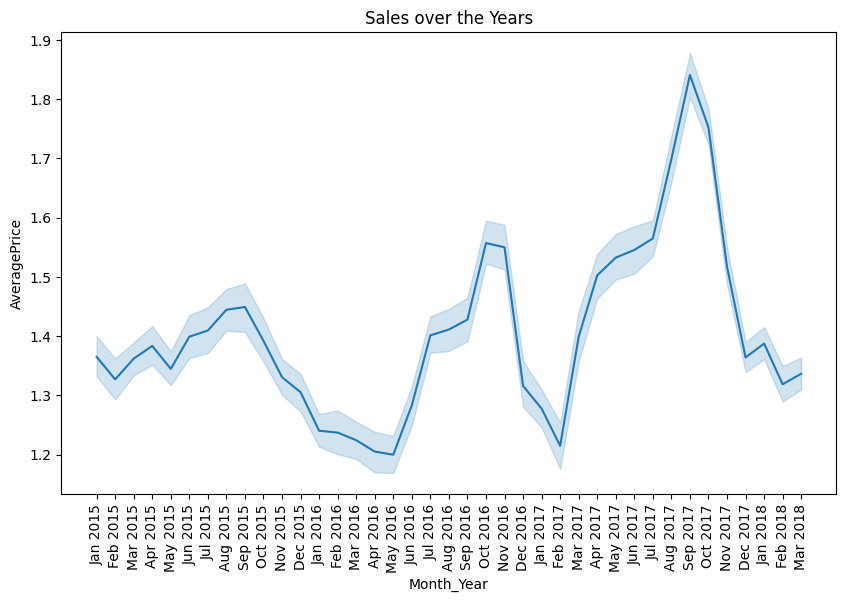

In [467]:

lineplot1(df['month_year'], df['AveragePrice'], "Month_Year", "AveragePrice")

I compared average price with month_year, my insights are on 2017 sept the average price was shooting up, so on every year on th month of sept thr is a peak on averageprice of avacado. so it increases year by year.

In [468]:
df['year'] = df['Date'].dt.strftime('%Y')

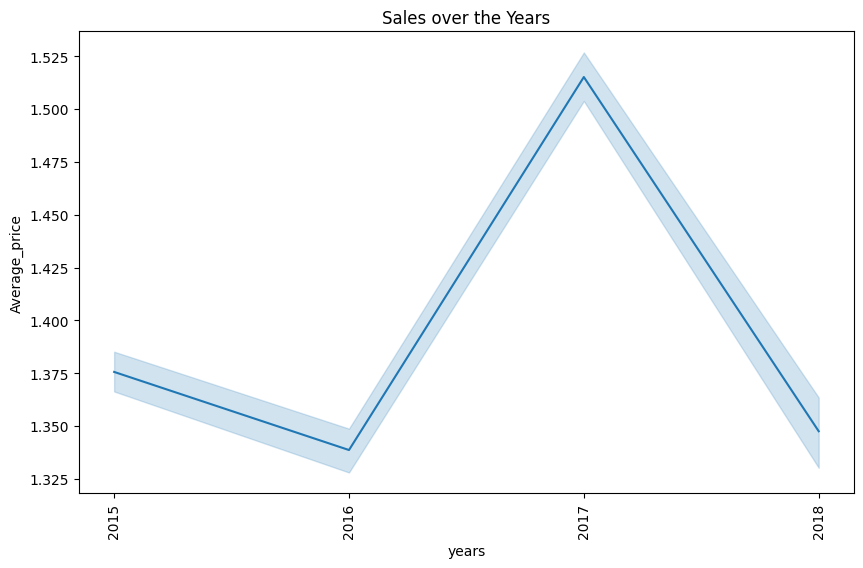

In [469]:
lineplot1(df['year'], df['AveragePrice'], "years", "Average_price")

In [470]:
df['Month'] = df['Date'].dt.strftime('%b')

In [471]:
df_month_avg_price = df[['AveragePrice', 'Month']].groupby(['Month'], as_index = False).mean()
df_month_avg_price

,Month,AveragePrice
0,Apr,1.374380
1,Aug,1.512514
2,Dec,1.331112
3,Feb,1.274387
4,Jan,1.311019
5,Jul,1.462077
6,Jun,1.408964
7,Mar,1.332255
8,May,1.346601
9,Nov,1.455563


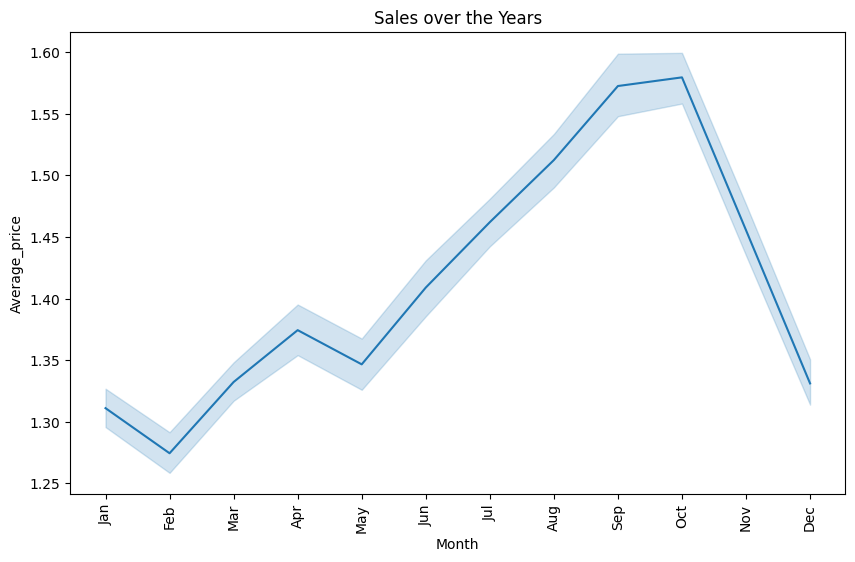

In [472]:
lineplot1(df['Month'], df['AveragePrice'], "Month", "Average_price")

I confirmed that insight that on sept there is a peak on averageprice of avacado

## Total volume vs Date

In [473]:
total_volume_date = df[['Total Volume', 'Month']].groupby(['Month'], as_index = False).mean()
total_volume_date['Total Volume'] = (total_volume_date['Total Volume'] / 1e6).map('{:.2f} M'.format)
total_volume_date.merge(df_month_avg_price, on = 'Month')

,Month,Total Volume,AveragePrice
0,Apr,0.88 M,1.374380
1,Aug,0.80 M,1.512514
2,Dec,0.77 M,1.331112
3,Feb,1.02 M,1.274387
4,Jan,0.90 M,1.311019
5,Jul,0.86 M,1.462077
6,Jun,0.93 M,1.408964
7,Mar,0.88 M,1.332255
8,May,0.97 M,1.346601
9,Nov,0.68 M,1.455563


Text(0.5, 1.0, 'Sales over the Years')

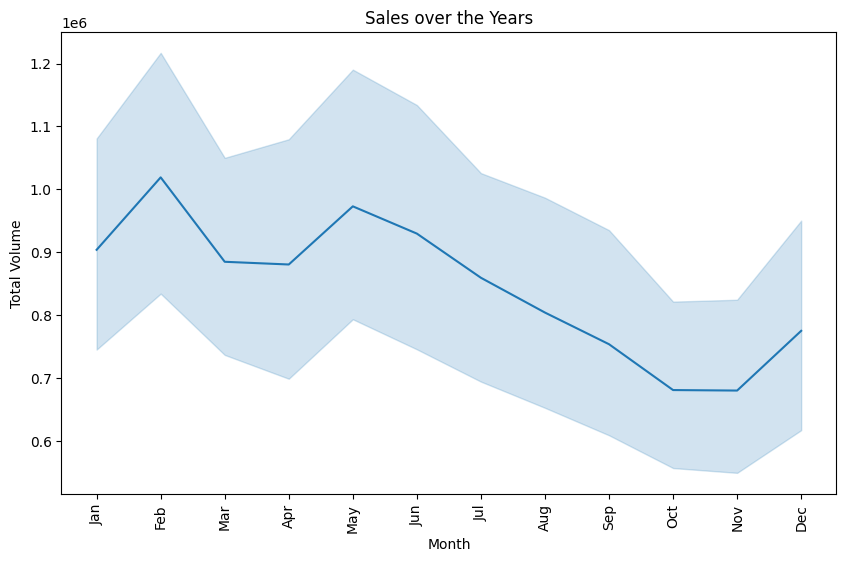

In [474]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Month'], y= df['Total Volume'], data=df)
plt.xticks(rotation=90) 
plt.title('Sales over the Years')
# plt.xlabel(a1)
# plt.ylabel(a2)

- on sept total volume is lower than any other months, so demand is high, so price is going up
- on last quarter of evry year total volume goes down and average price is inversely proportitional to total volume. demand and supply issue


In [475]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month_year,Month
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,Jan 2015,Jan
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,Jan 2015,Jan
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton,Jan 2015,Jan
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh,Jan 2015,Jan
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise,Jan 2015,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago,Mar 2018,Mar
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral,Mar 2018,Mar
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral,Mar 2018,Mar
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California,Mar 2018,Mar


## Region 

In [476]:
df['region'].info()

<class 'pandas.core.series.Series'>
Index: 18249 entries, 11569 to 8814
Series name: region
Non-Null Count  Dtype 
--------------  ----- 
18249 non-null  object
dtypes: object(1)
memory usage: 285.1+ KB


In [477]:
df['region'].value_counts()

region
Southeast              338
NewOrleansMobile       338
SanDiego               338
BaltimoreWashington    338
Roanoke                338
RichmondNorfolk        338
Northeast              338
SouthCentral           338
GreatLakes             338
Louisville             338
Seattle                338
CincinnatiDayton       338
NewYork                338
Indianapolis           338
Chicago                338
Jacksonville           338
Columbus               338
Detroit                338
Philadelphia           338
PhoenixTucson          338
Nashville              338
Portland               338
HartfordSpringfield    338
Tampa                  338
Orlando                338
West                   338
Denver                 338
GrandRapids            338
NorthernNewEngland     338
BuffaloRochester       338
HarrisburgScranton     338
Pittsburgh             338
Boise                  338
LosAngeles             338
LasVegas               338
Atlanta                338
DallasFtWorth        

In [478]:
df['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [479]:
df1 = df[['region', 'AveragePrice']].groupby(['region']).mean().reset_index()

In [480]:
df1 = df1.sort_values(['AveragePrice'])

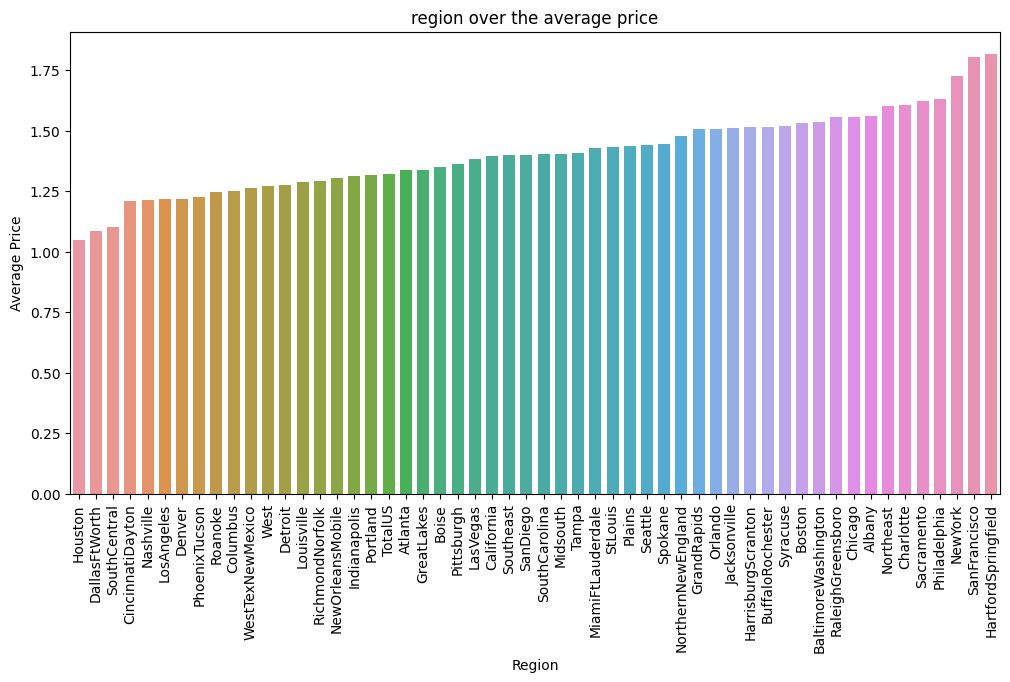

In [481]:
# plt.figure(figsize=(12, 8))
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(data = df1, x='region', y='AveragePrice',  width=0.7)
plt.xticks(rotation=90) 
plt.title('region over the average price')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()

- Average price varies from 1 to 1.75. minumum  average price is on Houston

In [482]:
df2 = df[['region', 'Total Volume']].groupby(['region']).mean().reset_index()

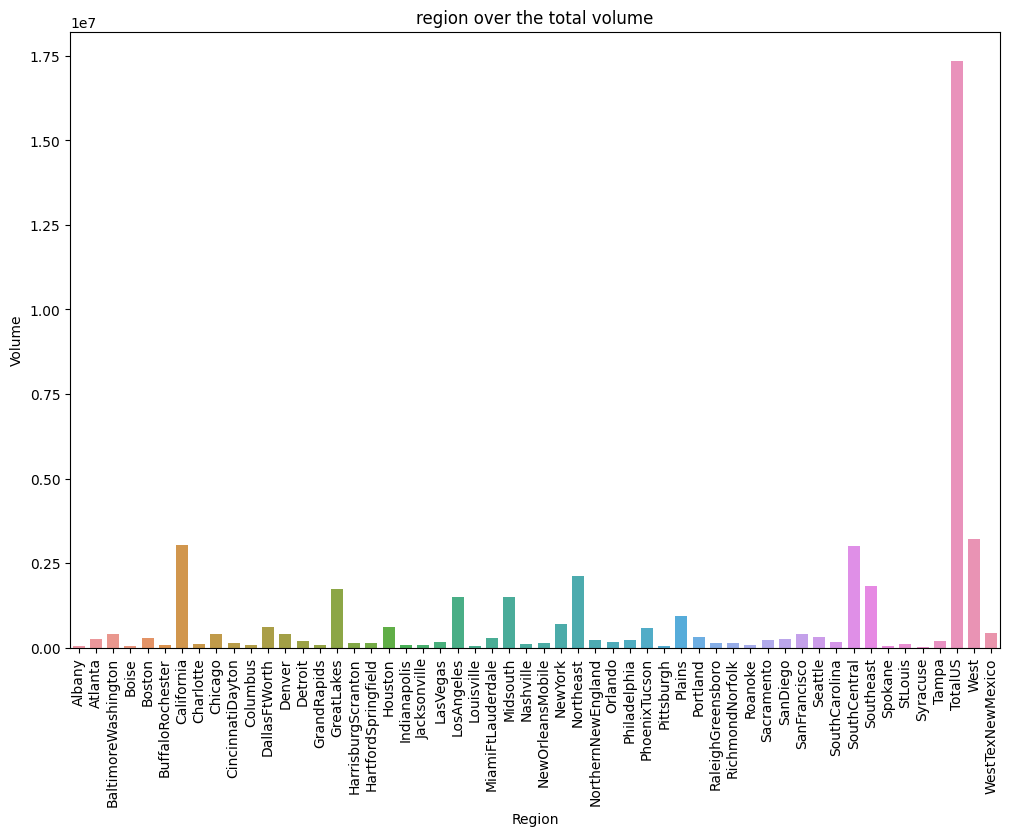

In [483]:
plt.figure(figsize=(12, 8))
sns.barplot(data = df2, x='region', y='Total Volume',  width=0.7)
plt.xticks(rotation=90) 
plt.title('region over the total volume')
plt.xlabel('Region')
plt.ylabel('Volume')
plt.show()

In [484]:
df3 = df[df['region'] == 'TotalUS']
df3.count()

Date            338
AveragePrice    338
Total Volume    338
4046            338
4225            338
4770            338
Total Bags      338
Small Bags      338
Large Bags      338
XLarge Bags     338
type            338
year            338
region          338
month_year      338
Month           338
dtype: int64

- ambiguity over 'TotalUS' so removing columns with region having 'TotalUS'

In [485]:
df = df[~df['region'].str.contains('TotalUS')]

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17911 entries, 11569 to 8814
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          17911 non-null  datetime64[ns]
 1   AveragePrice  17911 non-null  float64       
 2   Total Volume  17911 non-null  float64       
 3   4046          17911 non-null  float64       
 4   4225          17911 non-null  float64       
 5   4770          17911 non-null  float64       
 6   Total Bags    17911 non-null  float64       
 7   Small Bags    17911 non-null  float64       
 8   Large Bags    17911 non-null  float64       
 9   XLarge Bags   17911 non-null  float64       
 10  type          17911 non-null  object        
 11  year          17911 non-null  object        
 12  region        17911 non-null  object        
 13  month_year    17911 non-null  object        
 14  Month         17911 non-null  object        
dtypes: datetime64[ns](1), float64(9), obje

In [487]:
df4 = df[['region', 'Total Volume']].groupby(['region']).mean().reset_index()
df4 = df4.sort_values(['Total Volume'])

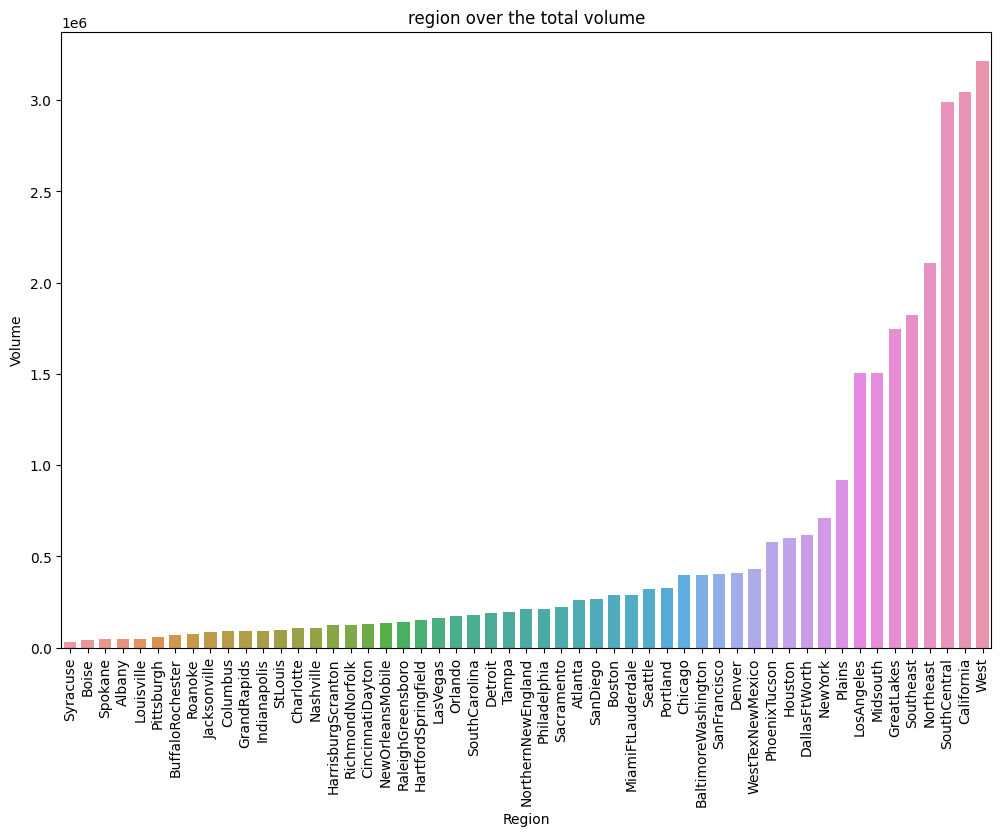

In [488]:
plt.figure(figsize=(12, 8))

sns.barplot(data = df4, x='region', y='Total Volume',  width=0.7)
plt.xticks(rotation=90) 
plt.title('region over the total volume')
plt.xlabel('Region')
plt.ylabel('Volume')
plt.show()

- California, SOuthCentral, West having high volume

In [489]:
df5 = df[df['region'].isin(['California', 'SouthCentral', 'West'])][['region', 'AveragePrice', 'Total Volume']]

In [490]:
df5.groupby(['region'], as_index = False).mean()

,region,AveragePrice,Total Volume
0,California,1.395325,3.044324e+06
1,SouthCentral,1.101243,2.991952e+06
2,West,1.272219,3.215323e+06


In [491]:
df['AveragePrice'].mean()

1.4076193400703478

- These are the 3 regions with high volume and while comparing the price its lover than the toal average_mean

## Type

In [492]:
df_type = df[['AveragePrice', 'type']].groupby(['type'], as_index = False).mean()
df_type

,type,AveragePrice
0,conventional,1.159285
1,organic,1.656036


- rate of organic is relatively high

Text(0, 0.5, 'average price')

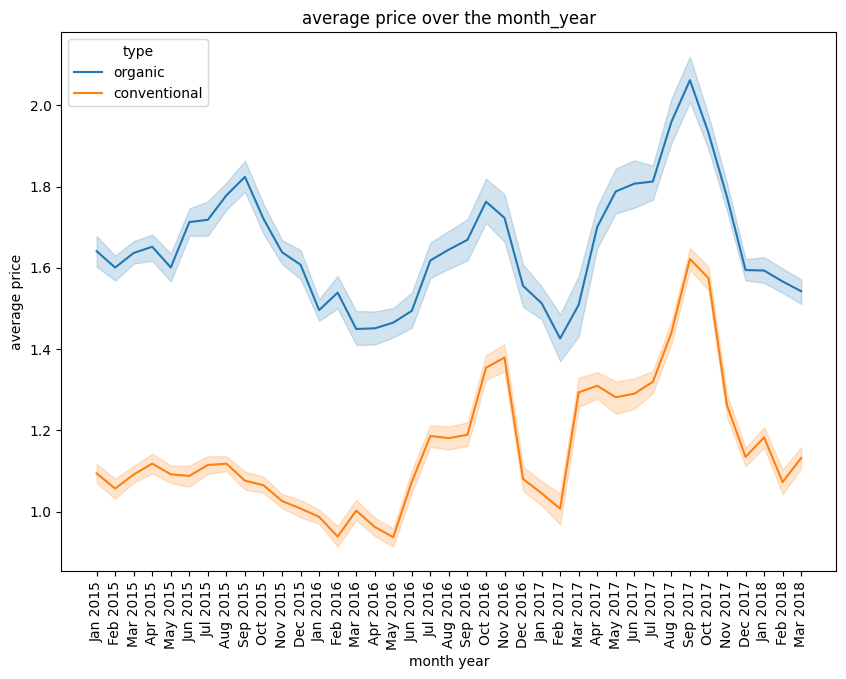

In [493]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=df, x="month_year", y="AveragePrice", hue="type")
plt.xticks(rotation=90)
plt.title('average price over the month_year')
plt.xlabel('month year')
plt.ylabel('average price')

In [494]:
df6 = df[['Total Volume', 'type']].groupby(['type'], as_index =False).mean()
round(df6)

,type,Total Volume
0,conventional,1047895.0
1,organic,30452.0


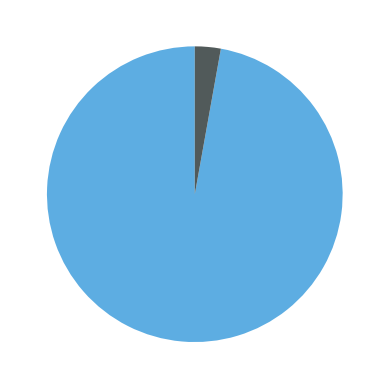

In [495]:
plt.pie([1047895.0,30452.0], startangle=90, colors=['#5DADE2', '#515A5A'])
plt.show()

Text(0, 0.5, 'total volume')

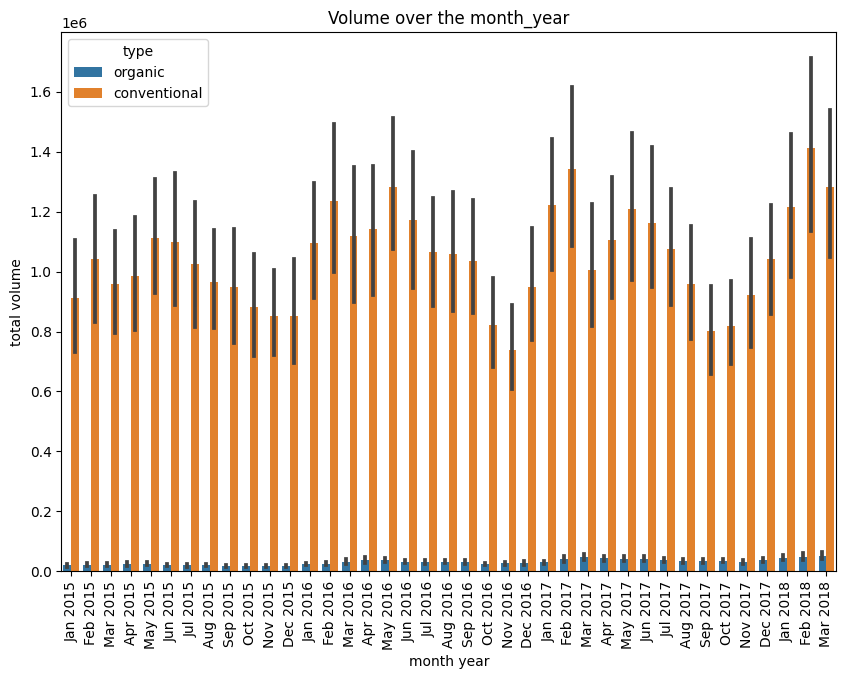

In [496]:
plt.figure(figsize=(10, 7))
sns.barplot(df, x="month_year", y="Total Volume", hue="type")
plt.xticks(rotation=90)
plt.title('Volume over the month_year')
plt.xlabel('month year')
plt.ylabel('total volume')

- Production of organic avacados are very low but the price are high.

In [497]:
df7 = df[df['type'] == 'organic']


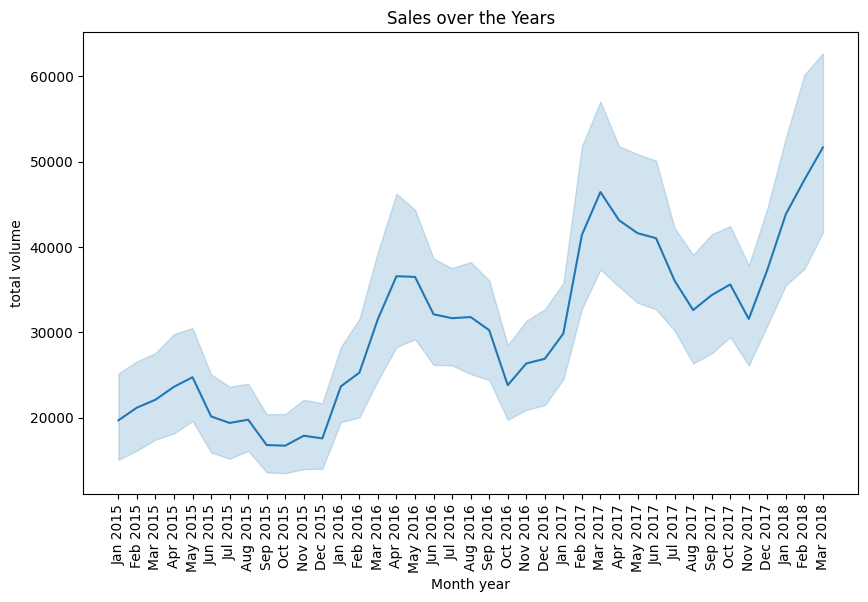

In [498]:
lineplot1(df7['month_year'], df7['Total Volume'], "Month year", "total volume")

- can able to see a significance improvemnt in the production of avocado

In [499]:
df = df.rename(columns = {'4046': 'Small_medium_avocado', '4225': 'large_avocado', '4770': 'extra_large_avocado'})

In [500]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['type'].head()

11569    1
9593     1
10009    1
1819     0
9333     1
Name: type, dtype: int32

In [501]:
original_value = label_encoder.inverse_transform([0])
print(original_value)

['conventional']


In [502]:
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])
df['region'].head()

11569    46
9593      8
10009    16
1819     34
9333      3
Name: region, dtype: int32

In [503]:
original_value = label_encoder.inverse_transform([0])
print(original_value)

['Albany']


In [504]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small_medium_avocado',
       'large_avocado', 'extra_large_avocado', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'month_year',
       'Month'],
      dtype='object')

In [505]:
df['Month'] = df['Date'].dt.strftime('%m')

In [506]:
drop_list = ['Date', 'month_year']
df8 = df.drop(columns = drop_list, axis = 1)

In [507]:
df8

,AveragePrice,Total Volume,Small_medium_avocado,large_avocado,extra_large_avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,1,2015,46,01
9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,2015,8,01
10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,1,2015,16,01
1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,0,2015,34,01
9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,1,2015,3,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,0,2018,8,03
9018,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,0,2018,45,03
18141,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,1,2018,45,03
17673,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,1,2018,6,03


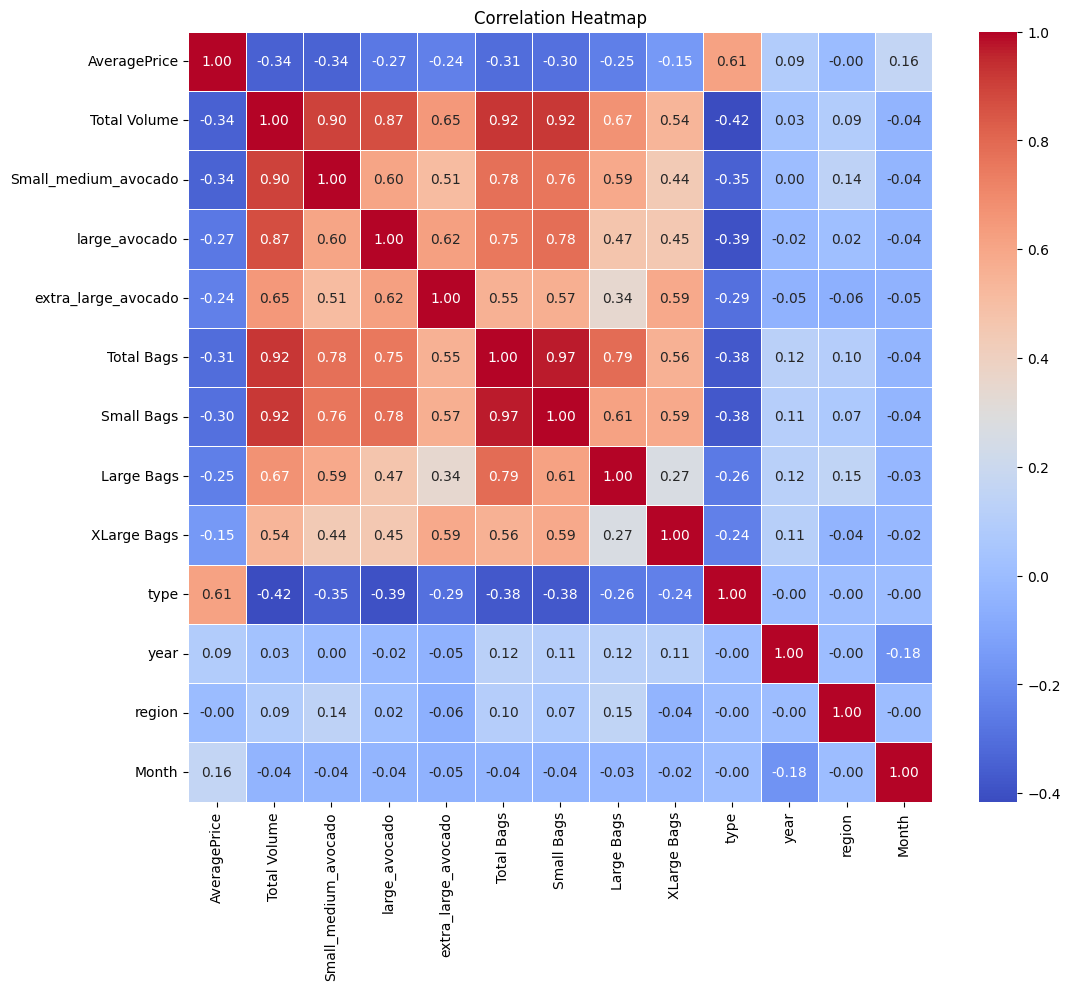

In [508]:
correlation_matrix = df8.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Modeling

## Linear Regression

In [509]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics

In [510]:
X = df8.drop( "AveragePrice", axis = 1 )
Y = df8['AveragePrice']

In [511]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17911 entries, 11569 to 8814
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AveragePrice          17911 non-null  float64
 1   Total Volume          17911 non-null  float64
 2   Small_medium_avocado  17911 non-null  float64
 3   large_avocado         17911 non-null  float64
 4   extra_large_avocado   17911 non-null  float64
 5   Total Bags            17911 non-null  float64
 6   Small Bags            17911 non-null  float64
 7   Large Bags            17911 non-null  float64
 8   XLarge Bags           17911 non-null  float64
 9   type                  17911 non-null  int32  
 10  year                  17911 non-null  object 
 11  region                17911 non-null  int32  
 12  Month                 17911 non-null  object 
dtypes: float64(9), int32(2), object(2)
memory usage: 1.8+ MB


In [519]:
model = LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)
pred=model.predict(X_test)


In [520]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23396827779546098
MSE: 0.09524887718314419
RMSE: 0.3086241681773224


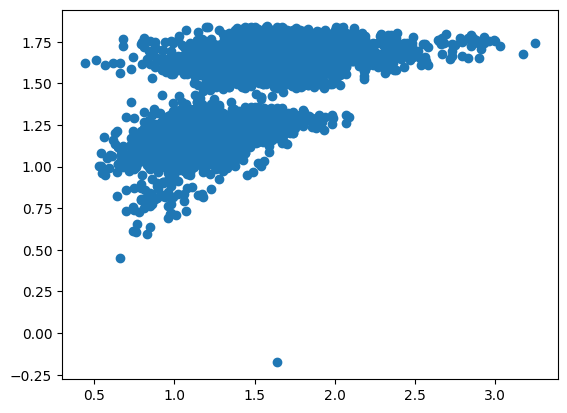

In [521]:
plt.scatter(x=y_test,y=pred)

- The lower the MSE, the better a model fits a dataset.

## Decision Tree

In [522]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [523]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12459670667038794
MSE: 0.03759226904828356
RMSE: 0.19388725860221853


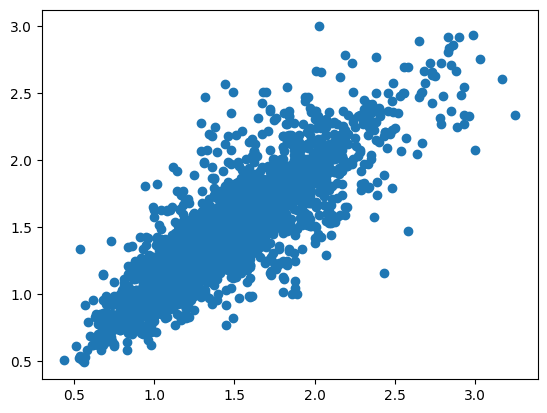

In [524]:
plt.scatter(x=y_test,y=pred)

rmse value is lower than linear regression

## Random Forest Regressor

In [525]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [526]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.09006516885291654
MSE: 0.01697553348311471
RMSE: 0.13029018951216054


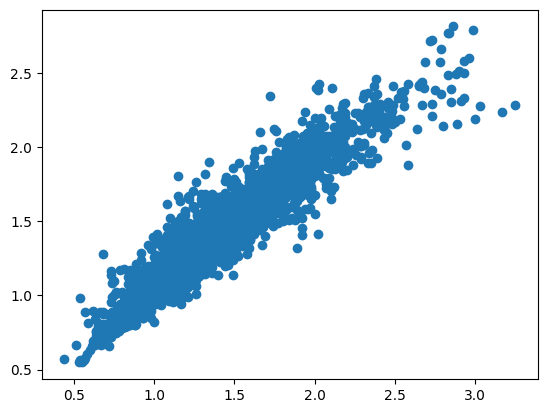

In [527]:
plt.scatter(x=y_test,y=pred)

again rmse value is lower on random forest

In [528]:
from sklearn.metrics import r2_score

In [529]:
rf_regressor = RandomForestRegressor()

In [530]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [531]:
y_pred = rf_regressor.predict(X_test)

In [532]:
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

R2 Score: 0.8957341805007459
